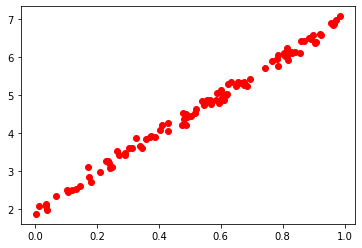

'\ncomo achar a equação do grafico abaixo\n\ncoeficiente angualar = y2 - y1 / x2 - x1\n\nx1 = 0\nx2 = 1\n\ny1 = 2\ny2 = 7\n\n\ncoeficiente angualar = 7 - 2 / 1 - 0\ncoeficiente angualar = 5 / 1\ncoeficiente angualar = 5\n\ny = 5x + 2\n'

In [ ]:
# Figure 3-6.
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
N = 100
w_true = 5
b_true = 2
noise_scale = .1
x_np = np.random.rand(N, 1)
noise = np.random.normal(scale=noise_scale, size=(N, 1))
# Convert shape of y_np to (N,)
y_np = np.reshape(w_true * x_np + b_true + noise, (-1))

# Plot code
plt.plot(x_np,y_np,'ro')
plt.show()
"""
como achar a equação do grafico abaixo

coeficiente angualar = y2 - y1 / x2 - x1

x1 = 0
x2 = 1

y1 = 2
y2 = 7


coeficiente angualar = 7 - 2 / 1 - 0
coeficiente angualar = 5 / 1
coeficiente angualar = 5

y = 5x + 2
"""

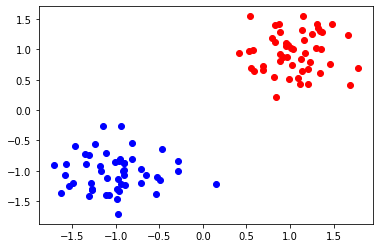

In [ ]:
# Figure 3-7.
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
N = 100
# Zeros form a Gaussian centered at (-1, -1)
# epsilon is .1
x_zeros = np.random.multivariate_normal(
mean=np.array((-1, -1)), cov=.1*np.eye(2), size=(int(N/2),))
y_zeros = np.zeros((int(N/2),))
# Ones form a Gaussian centered at (1, 1)
# epsilon is .1
x_ones = np.random.multivariate_normal(
mean=np.array((1, 1)), cov=.1*np.eye(2), size=(int(N/2),))
y_ones = np.ones((int(N/2),))
x_np = np.vstack([x_zeros, x_ones])
y_np = np.concatenate([y_zeros, y_ones])

# Plot code
plt.scatter(x=x_zeros[:, 0], y=x_zeros[:, 1], color="blue")
plt.scatter(x=x_ones[:, 0], y=x_ones[:, 1], color="red")
plt.show()

In [ ]:
# Example 3-5.
%tensorflow_version 2.x
import tensorflow as tf
a = tf.Variable(initial_value=2, name="a")
b = tf.Variable(initial_value=1, name="b")
c = a + b

In [ ]:
# Example 3-6
%tensorflow_version 2.x
import tensorflow as tf
N = 5
with tf.name_scope("placeholders"):
  x = tf.Variable(initial_value=2, name="x")
  y = tf.Variable(initial_value=1, name="y")
x

<tf.Variable 'placeholders/x:0' shape=() dtype=int32, numpy=2>

In [ ]:
# Example 3-8
%tensorflow_version 2.x
import tensorflow as tf
import datetime

W = tf.Variable((3.0,))

@tf.function
def example():
  with tf.GradientTape() as g:
    g.watch(W)
    l = tf.reduce_sum(W)
  return tf.gradients(l, W)

example()


[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>]

In [ ]:

import numpy as np
from sklearn.metrics import accuracy_score
from scipy.special import logit

N = 100
x_zeros = np.random.multivariate_normal(
    mean=np.array((-1, -1)), cov=.1*np.eye(2), size=(N//2,))
y_zeros = np.zeros((N//2,))
x_ones = np.random.multivariate_normal(
    mean=np.array((1, 1)), cov=.1*np.eye(2), size=(N//2,))
y_ones = np.ones((N//2,))

x_np = np.vstack([x_zeros, x_ones])
y_np = np.concatenate([y_zeros, y_ones])

In [ ]:
# Example 3-14. 
%load_ext tensorboard

%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
# import numpy as np

# N = 100
# x_zeros = np.random.multivariate_normal(
#     mean=np.array((-1, -1)), cov=.1*np.eye(2), size=(N//2,))
# y_zeros = np.zeros((N//2,))
# x_ones = np.random.multivariate_normal(
#     mean=np.array((1, 1)), cov=.1*np.eye(2), size=(N//2,))
# y_ones = np.ones((N//2,))

# x_np = np.vstack([x_zeros, x_ones])
# y_np = np.concatenate([y_zeros, y_ones])

log_dir = "/tmp/fit2/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
model.compile(optimizer=tf.keras.optimizers.SGD(), #tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
history = model.fit(x_np, y_np, epochs=100, callbacks=[tensorboard_callback])

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2753 - accuracy: 1.0000
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2715 - accuracy: 1.0000
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2677 - accuracy: 1.0000
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2640 - accuracy: 1.0000
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 1.0000
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2570 - accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 1.0000
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2503 - accuracy: 1.0000
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 1.0000
Epoch 10/100
4/4 [===================

Classification Accuracy


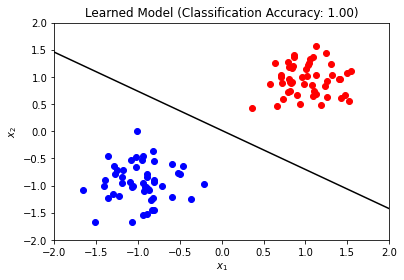

In [ ]:
test_predictions = model.predict(x_np).flatten()

w_final, b_final = history.model.get_weights()

print("Classification Accuracy")

plt.clf()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Learned Model (Classification Accuracy: 1.00)")
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# Plot Zeros
plt.scatter(x_zeros[:, 0], x_zeros[:, 1], color="blue")
plt.scatter(x_ones[:, 0], x_ones[:, 1], color="red")

x_left = -2
y_left = (1./w_final[1]) * (-b_final + logit(.5) - w_final[0]*x_left)

x_right = 2
y_right = (1./w_final[1]) * (-b_final + logit(.5) - w_final[0]*x_right)
plt.plot([x_left, x_right], [y_left, y_right], color='k')

In [ ]:
history.model.get_weights()

[array([[1.336907 ],
        [1.1083374]], dtype=float32), array([0.01897691], dtype=float32)]